C:\Users\Home\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


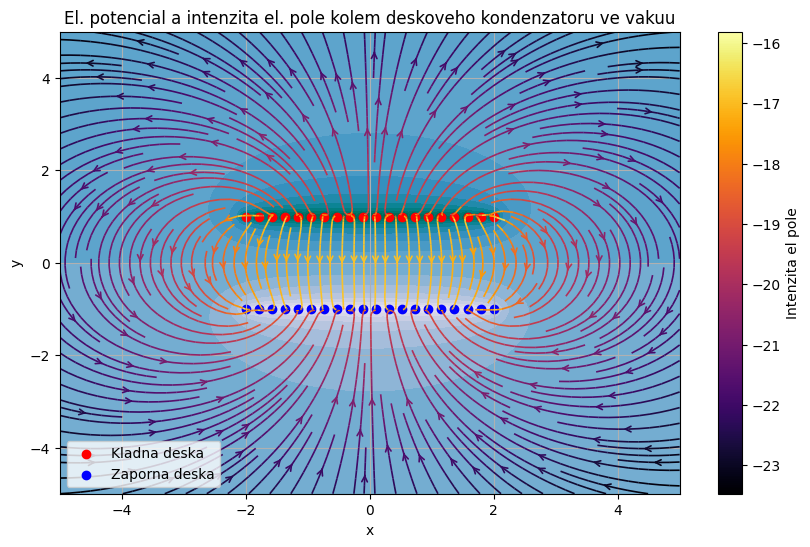

In [3]:
import matplotlib.pyplot as plt
import numpy as np

EPSILON_O = 8.854e-12

# :param X, Y: Сетка координат для расчета потенциала.
def spocitat_potencial(X,Y, polohy_naboju_x, polohy_naboju_y, hustota_naboje):
    potencial= np.zeros_like(X)
    #polohy = [(x1, y1), (x2, y2), ... pro vsechny souradnice naboju]
    polohy = zip(polohy_naboju_x, polohy_naboju_y)
    for poloha_naboje in polohy:
        vzdalenost = np.sqrt((X - poloha_naboje[0])**2 + (Y - poloha_naboje[1])**2)
        potencial += hustota_naboje / (4 * np.pi * EPSILON_O * vzdalenost)
    return potencial
 

def spocitat_E(X,Y,  polohy_naboju_x, polohy_naboju_y,hustota_naboje):
    E_x = np.zeros_like(X)
    E_y = np.zeros_like(Y)
    for i in range(len(polohy_naboju_x)):
        dx = X - polohy_naboju_x[i]
        dy = Y - polohy_naboju_y[i]
        E_x += (hustota_naboje * dx) / (dx**2 + dy**2)
        E_y += (hustota_naboje * dy) / (dx**2 + dy**2)
    return E_x, E_y


def main():
    pole = 10
    pocet_bunek = 120 
    vzdalenost_desek = 2
    hustota_naboje= 1e-5        #naboj = hustota_naboje * delka_desky
    delka_desky= 4
    pocet_naboju= 20

    kladna_deska_x = np.linspace(-delka_desky/2, delka_desky/2, pocet_naboju) 
    zaporna_deska_x = np.linspace(-delka_desky/2, delka_desky/2, pocet_naboju)
    # np.full vyvori array [-vzdalenost/2, -vzdalenost/2 ... tolikrat, kolik je pocet naboju]
    kladna_deska_y = np.full(shape=(pocet_naboju), fill_value=vzdalenost_desek/2)
    zaporna_deska_y = np.full(shape=(pocet_naboju), fill_value=-vzdalenost_desek/2)

    x = np.linspace(-pole/2, pole/2, pocet_bunek)
    y = np.linspace(-pole/2, pole/2, pocet_bunek)
    X,Y = np.meshgrid(x,y) 
 
    phi_celkove = spocitat_potencial(X,Y, kladna_deska_x, kladna_deska_y, hustota_naboje)
    phi_pro_kladnou_desku = spocitat_potencial(X,Y, kladna_deska_x, kladna_deska_y, hustota_naboje)
    phi_pro_zapornou_desku = spocitat_potencial(X,Y, zaporna_deska_x, zaporna_deska_y, -hustota_naboje)
    phi_celkove = phi_pro_kladnou_desku + phi_pro_zapornou_desku   
    
    E_x_kladny, E_y_kladny = spocitat_E(X,Y, kladna_deska_x, kladna_deska_y, hustota_naboje)
    E_x_zaporny, E_y_zaporny = spocitat_E(X,Y, zaporna_deska_x, zaporna_deska_y, -hustota_naboje)

    E_x, E_y = E_x_kladny + E_x_zaporny, E_y_kladny + E_y_zaporny
    # E_x, E_y = np.gradient(-phi_celkove)


    plt.figure(figsize=(10, 6))
    plt.contourf(X, Y, phi_celkove, levels=20, cmap='PuBuGn')    
    color = 2 * np.log(np.hypot(E_x, E_y))
    plt.streamplot(X, Y, E_x, E_y, color=color, density= 2, linewidth= 1.2, cmap= 'inferno', arrowstyle= '->')
    plt.colorbar(label='Intenzita el pole')
    plt.scatter(kladna_deska_x, kladna_deska_y, color='red', label='Kladna deska')
    plt.scatter(zaporna_deska_x, zaporna_deska_y, color='blue', label='Zaporna deska')
    plt.title('El. potencial a intenzita el. pole kolem deskoveho kondenzatoru ve vakuu')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    #plt.savefig("phi.png")
    plt.show()

main()

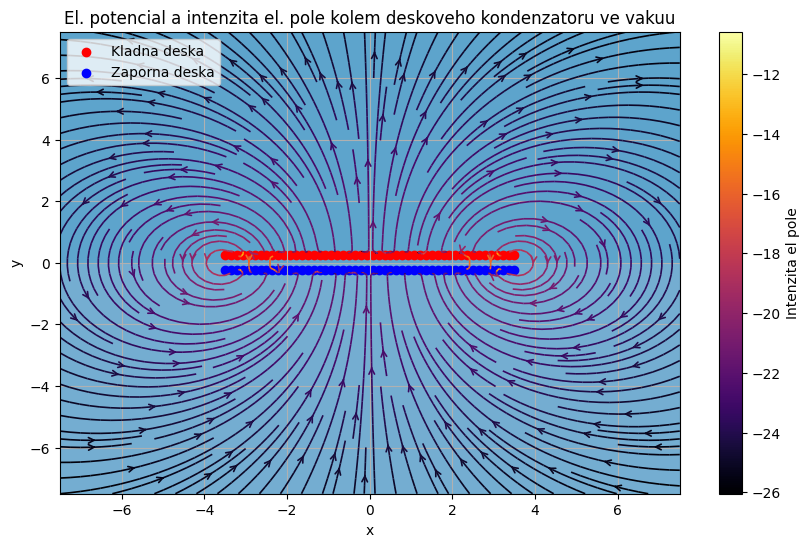

In [7]:
def main():
    pole = 15
    pocet_bunek = 150 
    vzdalenost_desek = 0.5
    hustota_naboje= 1e-5       
    delka_desky= 7
    pocet_naboju= 50 

    kladna_deska_x = np.linspace(-delka_desky/2, delka_desky/2, pocet_naboju) 
    zaporna_deska_x = np.linspace(-delka_desky/2, delka_desky/2, pocet_naboju)
    kladna_deska_y = np.full(shape=(pocet_naboju), fill_value=vzdalenost_desek/2)
    zaporna_deska_y = np.full(shape=(pocet_naboju), fill_value=-vzdalenost_desek/2)

    x = np.linspace(-pole/2, pole/2, pocet_bunek)
    y = np.linspace(-pole/2, pole/2, pocet_bunek)
    X,Y = np.meshgrid(x,y) 
 
    phi_celkove = spocitat_potencial(X,Y, kladna_deska_x, kladna_deska_y, hustota_naboje)
    phi_pro_kladnou_desku = spocitat_potencial(X,Y, kladna_deska_x, kladna_deska_y, hustota_naboje)
    phi_pro_zapornou_desku = spocitat_potencial(X,Y, zaporna_deska_x, zaporna_deska_y, -hustota_naboje)
    phi_celkove = phi_pro_kladnou_desku + phi_pro_zapornou_desku   
    
    E_x_kladny, E_y_kladny = spocitat_E(X,Y, kladna_deska_x, kladna_deska_y, hustota_naboje)
    E_x_zaporny, E_y_zaporny = spocitat_E(X,Y, zaporna_deska_x, zaporna_deska_y, -hustota_naboje)

    E_x, E_y = E_x_kladny + E_x_zaporny, E_y_kladny + E_y_zaporny


    plt.figure(figsize=(10, 6))
    plt.contourf(X, Y, phi_celkove, levels=20, cmap='PuBuGn')    
    color = 2 * np.log(np.hypot(E_x, E_y))
    plt.streamplot(X, Y, E_x, E_y, color=color, density= 2, linewidth= 1.2, cmap= 'inferno', arrowstyle= '->')
    plt.colorbar(label='Intenzita el pole')
    plt.scatter(kladna_deska_x, kladna_deska_y, color='red', label='Kladna deska')
    plt.scatter(zaporna_deska_x, zaporna_deska_y, color='blue', label='Zaporna deska')
    plt.title('El. potencial a intenzita el. pole kolem deskoveho kondenzatoru ve vakuu')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.savefig("phi2.png")
    plt.show()

main()